In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.dropna(inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [5]:
df.shape

(506, 14)

In [6]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,320,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,329,23.0,343.00,76.00,67.0


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.617404,11.289526,11.174842,0.069170,0.555209,6.287589,68.555731,3.775231,9.531621,408.330040,18.498419,356.228379,12.872569,22.711858
std,8.600123,23.325350,6.824592,0.253994,0.115611,0.703802,28.161573,2.096147,8.716661,168.382685,2.202078,91.253462,7.823528,9.520520
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082268,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.098500,4.000000,280.250000,17.400000,374.687500,6.950000,17.025000
50%,0.266005,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.122200,5.000000,330.000000,19.100000,391.260000,11.465000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.629750,93.975000,5.117675,24.000000,666.000000,20.200000,396.210000,17.107500,25.075000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


In [8]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 404
No. of testing examples: 102


In [9]:
training_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
119,0.14476,0.0,10.01,0,0.547,5.731,65.2,2.7592,6,432,17.8,391.50,13.61,19.3
315,0.25356,0.0,9.90,0,0.544,5.705,77.7,3.9450,4,304,18.4,396.42,11.50,16.2
430,8.49213,0.0,18.10,0,0.584,6.348,86.1,2.0527,24,666,20.2,83.45,17.64,14.5
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27,13.4
395,8.71675,0.0,18.10,0,0.693,6.471,98.8,1.7257,24,666,20.2,391.98,17.12,13.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,0.35114,0.0,7.38,0,0.493,6.041,49.9,4.7211,5,287,19.6,396.90,7.70,20.4
148,2.33099,0.0,19.58,0,0.871,5.186,93.8,1.5296,5,403,14.7,356.99,28.32,17.8
479,14.33370,0.0,18.10,0,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
323,0.28392,0.0,7.38,0,0.493,5.708,74.3,4.7211,5,287,19.6,391.13,11.74,18.5


In [10]:
training_data['CHAS'].value_counts()

0    375
1     29
Name: CHAS, dtype: int64

In [11]:
training_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
119,0.14476,0.0,10.01,0,0.547,5.731,65.2,2.7592,6,432,17.8,391.50,13.61,19.3
315,0.25356,0.0,9.90,0,0.544,5.705,77.7,3.9450,4,304,18.4,396.42,11.50,16.2
430,8.49213,0.0,18.10,0,0.584,6.348,86.1,2.0527,24,666,20.2,83.45,17.64,14.5
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27,13.4
395,8.71675,0.0,18.10,0,0.693,6.471,98.8,1.7257,24,666,20.2,391.98,17.12,13.1


In [12]:
training_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.575328,11.299505,11.092574,0.071782,0.558344,6.279943,69.100495,3.786057,9.665842,411.326733,18.430198,356.614629,12.912203,22.532178
std,7.941542,23.145229,6.726056,0.258447,0.118487,0.721350,27.737390,2.121488,8.722904,167.800579,2.262978,89.631819,7.990228,9.454097
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083672,0.000000,5.190000,0.000000,0.453000,5.873500,45.325000,2.095550,4.000000,284.000000,17.225000,374.237500,6.927500,16.775000
50%,0.324035,0.000000,9.690000,0.000000,0.538000,6.211500,77.700000,3.142300,5.000000,334.500000,18.950000,390.925000,11.395000,21.200000
75%,3.694070,12.500000,18.100000,0.000000,0.635000,6.632000,94.100000,5.117025,24.000000,666.000000,20.200000,395.690000,16.947500,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


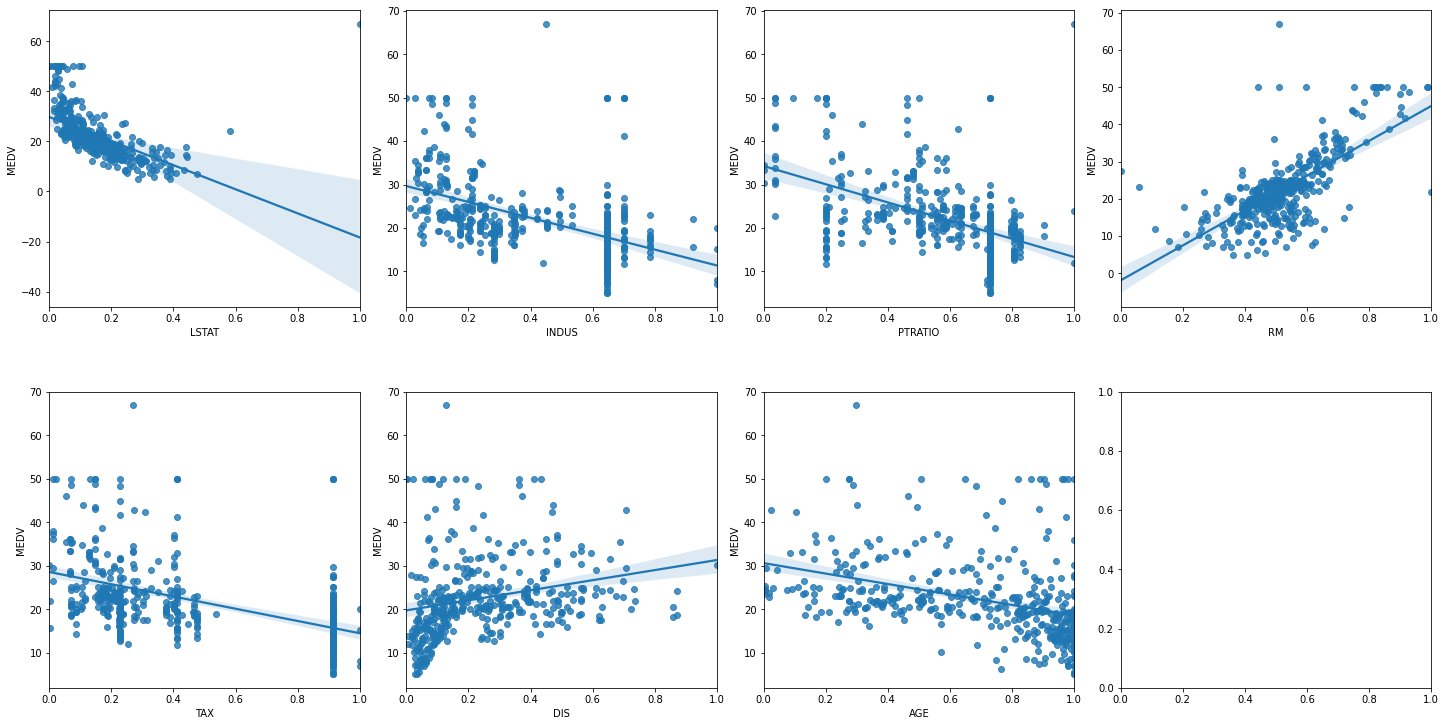

In [13]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = training_data.loc[:,column_sels]
y = training_data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

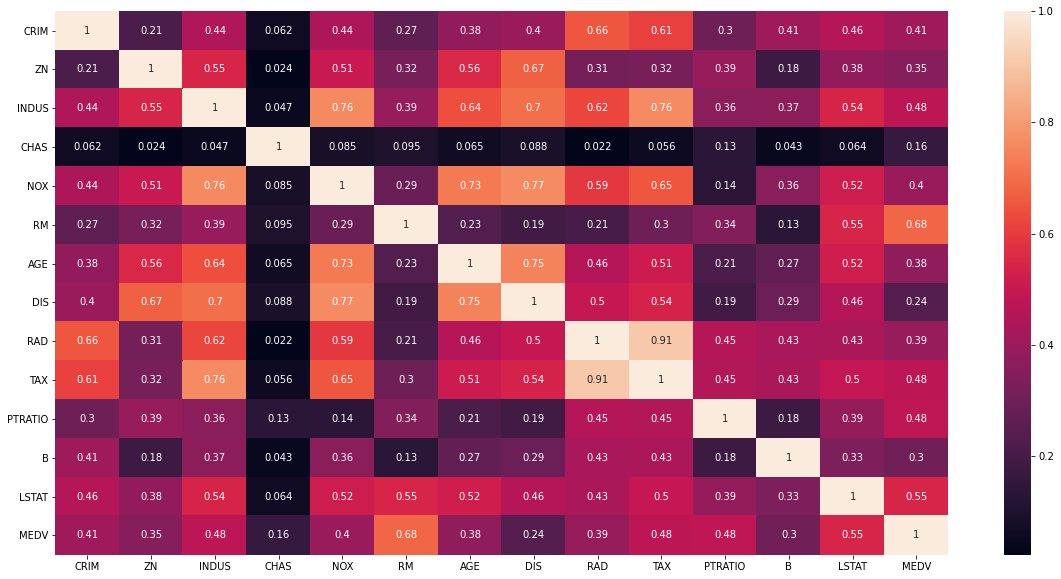

In [14]:
plt.figure(figsize=(20, 10))
sns.heatmap(training_data.corr().abs(),  annot=True)

In [27]:
import statsmodels.api as sm # import statsmodels 

X = training_data[x_names] ## X usually means our input variables (or independent variables)
y = training_data['MEDV'] ## Y usually means our output/dependent variable
X = sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     59.17
Date:                Mon, 30 Aug 2021   Prob (F-statistic):           3.61e-80
Time:                        13:13:35   Log-Likelihood:                -1271.2
No. Observations:                 404   AIC:                             2568.
Df Residuals:                     391   BIC:                             2620.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1108      6.216      2.270      0.024       1.891      26.331
CRIM          -0.1163      0.048     -2.410      0.016      -0.211      -0.021
ZN             0.0402      0.019      2.069      0.039       0.002       0.078
INDUS         -0.0646      0.087     -0.739      0.460      -0.237       0.107
CHAS           2.8398      1.135      2.502      0.013       0.608       5.072
NOX          -13.5754      4.864     -2.791      0.006     -23.137      -4.013
RM             6.2249      0.507     12.274      0.000       5.228       7.222
AGE           -0.0659      0.017     -3.833      0.000      -0.100      -0.032
DIS           -1.6350      0.273     -5.991      0.000      -2.172      -1.098
TAX           -0.0034      0.003     -0.991      0.322      -0.010       0.003
PTRATIO       -0.7419      0.170     -4.351      0.000      -1.077      -0.407
B              0.0100      0.004      2.732      0.007       0.003       0.017
LSTAT         -0.0295      0.053     -0.559      0.577      -0.133       0.074
==============================================================================
Omnibus:                      285.048   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4776.984
Skew:                           2.783   Prob(JB):                         0.00
Kurtosis:                      18.900   Cond. No.                     1.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
class Stats:
    
    def __init__(self, X, y, model):
        self.data = X
        self.target = y
        self.model = model
        ## degrees of freedom population dep. variable variance
        self._dft = X.shape[0] - 1   
        ## degrees of freedom population error variance
        self._dfe = X.shape[0] - X.shape[1] - 1  
    
    def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (self.target - self.model.predict(self.data)) ** 2
        return np.sum(squared_errors)
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target)
        squared_errors = (self.target - avg_y) ** 2
        return np.sum(squared_errors)
      
    def r_squared(self):
        '''returns calculated value of r^2'''
        return 1 - self.sse()/self.sst()
    
    def adj_r_squared(self):
        '''returns calculated value of adjusted r^2'''
        return 1 - (self.sse()/self._dfe) / (self.sst()/self._dft)

In [29]:
def pretty_print_stats(stats_obj):
    '''returns report of statistics for a given model object'''
    items = ( ('sse:', stats_obj.sse()), ('sst:', stats_obj.sst()), 
             ('r^2:', stats_obj.r_squared()), ('adj_r^2:', stats_obj.adj_r_squared()) )
    for item in items:
        print('{0:8} {1:.4f}'.format(item[0], item[1]))

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=False)
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [31]:
stats = Stats(X, y, lr)
pretty_print_stats(stats)

sse:     12790.9248
sst:     36020.1217
r^2:     0.6449
adj_r^2: 0.6331


[0.45591854157005507, 0.11842329432184617, 0.09211887642076803, 0.07238504051057312, 0.06399125721846177, 0.053199665909338306, 0.04230408103637365, 0.03622031289609256, 0.023157757955060684, 0.01204196407106496, 0.014566232938428653, 0.015672975151937014]
[0.45591854157005507, 0.5743418358919012, 0.6664607123126692, 0.7388457528232424, 0.8028370100417042, 0.8560366759510425, 0.8983407569874161, 0.9345610698835086, 0.9577188278385693, 0.9697607919096343, 0.9843270248480629, 0.9999999999999999]


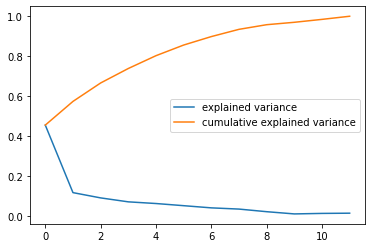

In [17]:
from sklearn.preprocessing import StandardScaler

x_names = training_data.columns[0:13]           # ploting all x variables with y 
y_name = training_data.columns[-1]

x_names = x_names.drop("RAD")
x_scaled = StandardScaler().fit_transform(training_data[x_names])
features = x_scaled.T
cov_matrix = np.cov(features)
values, vectors = np.linalg.eig(cov_matrix)
explained_variances = []
cum_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
    cum_variances.append(sum(explained_variances))
 
print(explained_variances)
print(cum_variances)
plt.plot(explained_variances, label = "explained variance")
plt.plot(cum_variances, label = "cumulative explained variance")
plt.legend(loc = "right")

In [44]:
x_train = training_data[x_names]
x_test = testing_data[x_names]
x_train_scaled = StandardScaler().fit_transform(training_data[x_names])
x_test_scaled = StandardScaler().fit_transform(testing_data[x_names])
y_train = training_data['MEDV']
y_test = testing_data['MEDV']

In [25]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

model = LinearRegression()
model.fit(x_train,y_train)
#print(model.intercept_)
#print(model.coef_)
x_train2 = sm.add_constant(x_train)
est = sm.OLS(y_train, x_train2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     59.17
Date:                Mon, 30 Aug 2021   Prob (F-statistic):           3.61e-80
Time:                        13:11:20   Log-Likelihood:                -1271.2
No. Observations:                 404   AIC:                             2568.
Df Residuals:                     391   BIC:                             2620.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1108      6.216      2.270      0.0

AttributeError: ignored

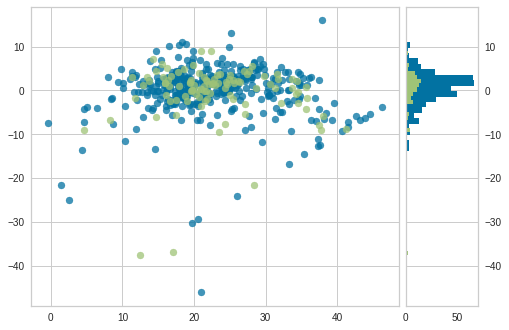

In [45]:
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)
visualizer.show()     

MSE train 31.66
MAE train 3.58
RMSE train 5.63
MSE test 45.76
MAE test 3.82
RMSE test 6.76
Average value of r2 score for cross validation was equal to 0.5414.


Text(0, 0.5, 'Real values')

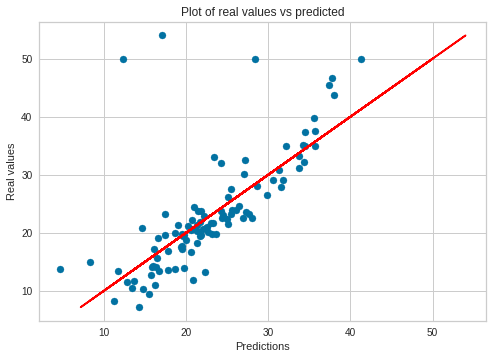

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

y_pred_train1 = model.predict(x_train)
y_pred_test1 = model.predict(x_test)
print("MSE train", round(mean_squared_error(y_train,y_pred_train1),2))
print("MAE train", round(mean_absolute_error(y_train,y_pred_train1),2))
print("RMSE train", round(np.sqrt(mean_squared_error(y_train,y_pred_train1)),2))
print("MSE test", round(mean_squared_error(y_test,y_pred_test1),2))
print("MAE test", round(mean_absolute_error(y_test,y_pred_test1),2))
print("RMSE test", round(np.sqrt(mean_squared_error(y_test,y_pred_test1)),2))
score = cross_val_score(model,x_train,y_train, scoring ="r2" ,cv=RepeatedKFold(n_splits=10, n_repeats=3, random_state=1),n_jobs=-1)
print("Average value of r2 score for cross validation was equal to {}.".format(round(score.mean(),4)))
plt.scatter(y_pred_test1, y_test)
plt.plot(y_test, y_test, color = "red")
plt.title("Plot of real values vs predicted")
plt.xlabel('Predictions')
plt.ylabel('Real values')